#Import Data and Dependencies

In [ ]:
#Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Splitting the fashion data to train and test
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [ ]:
#Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

#Training the model

In [ ]:
#Creating the CNN
model = models.Sequential([
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)), #2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
    layers.MaxPooling2D((2, 2)), #2x2 max pooling
    layers.Conv2D(56, (3, 3), activation='relu'), #2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
    layers.Flatten(),
    layers.Dense(56, activation='relu'), #fully-connected layer, 56 nodes, ReLU activation
    layers.Dense(10, activation='softmax') #fully-connected layer, 10 nodes, softmax activation
])

In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Using last 12000 samples of the training data as a validation set
val_images = x_train[-12000:]
val_labels = y_train[-12000:]
train_images = x_train[:-12000]
train_labels = y_train[:-12000]

In [ ]:
#Running the model for 10 epochs with batch size as 32
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10,
                    validation_data=(val_images[..., np.newaxis], val_labels), batch_size=32)


Epoch 1/10
1500/1500 [==============================] - 61s 40ms/step - loss: 0.4243 - accuracy: 0.8485 - val_loss: 0.3203 - val_accuracy: 0.8857
Epoch 2/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2744 - accuracy: 0.8999 - val_loss: 0.2592 - val_accuracy: 0.9057
Epoch 3/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2280 - accuracy: 0.9163 - val_loss: 0.2557 - val_accuracy: 0.9064
Epoch 4/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1937 - accuracy: 0.9288 - val_loss: 0.2357 - val_accuracy: 0.9172
Epoch 5/10
1500/1500 [==============================] - 59s 40ms/step - loss: 0.1627 - accuracy: 0.9397 - val_loss: 0.2311 - val_accuracy: 0.9190
Epoch 6/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1352 - accuracy: 0.9494 - val_loss: 0.2267 - val_accuracy: 0.9201
Epoch 7/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1144 - accuracy: 0.9576 - val_loss: 0.2623 -

In [ ]:
#Printing the accuracy per epoch
history.history['accuracy']

[0.8484583497047424,
 0.8998749852180481,
 0.9162708520889282,
 0.9287916421890259,
 0.9397083520889282,
 0.9493541717529297,
 0.9576249718666077,
 0.9634583592414856,
 0.9697083234786987,
 0.9758333563804626]

In [ ]:
#Printing the validation accuracy per epoch
history.history['val_accuracy']

[0.8857499957084656,
 0.9057499766349792,
 0.906416654586792,
 0.9172499775886536,
 0.9190000295639038,
 0.9200833439826965,
 0.9160000085830688,
 0.9128333330154419,
 0.9167500138282776,
 0.9088333249092102]

#Analyzing the errors and predictions

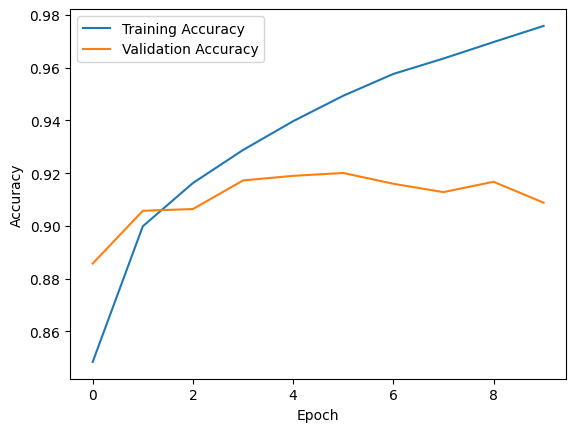

In [ ]:
#Plotting the graph for accuracy and validation accuracy er epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#Printing the number of trainable parameters in the model
print(model.count_params())

394530


In [ ]:
#Printing test accuracy
test_loss, test_acc = model.evaluate(x_test[..., np.newaxis], y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.3473 - accuracy: 0.9091
Test accuracy: 0.9090999960899353


In [ ]:
#Initializing the midclassified data
test_predictions = model.predict(x_test[..., np.newaxis])
misclassified = np.where(np.argmax(test_predictions, axis=1) != y_test)[0]

313/313 [==============================] - 3s 9ms/step


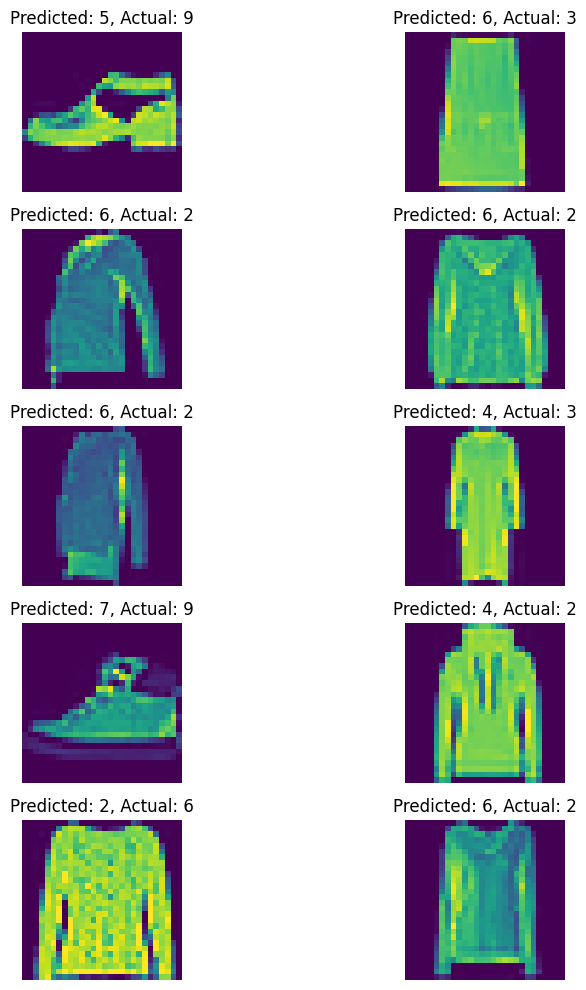

In [ ]:
#Plotting the misclassified data
plt.figure(figsize=(10, 10))
for i, x in enumerate(misclassified[:10]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[x])
    plt.title(f"Predicted: {np.argmax(test_predictions[x])}, Actual: {y_test[x]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_classes)

print(classification_rep)

313/313 [==============================] - 7s 23ms/step
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.90      0.80      0.85      1000
           3       0.94      0.89      0.91      1000
           4       0.78      0.94      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.73      0.77      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



From the above classification report, we can see that our model has a very high accuracy and the prediction and recall for every clothing is also a high which shows that our model is really close to the actual model. If we try to add more dense layers to our model, and change the optimizer and loss, we might get better accuracy and precision which would result in a better trained model.